In [1]:
import numpy as np

In [2]:
M = np.array([[0, 2, 1, 1, 1, 1, 1, 2, 1, 3],
              [2, 0, 1, 1, 1, 0, 0, 1, 1, 2],
              [1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
              [1, 1, 1, 0, 1, 0, 0, 0, 0, 1],
              [1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
              [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
              [2, 1, 0, 0, 0, 1, 1, 0, 1, 2],
              [1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
              [3, 2, 1, 1, 1, 1, 1, 2, 1, 0]])

In [7]:
def pmi(M, positive=True):
    col_totals = M.sum(axis=0)
    row_totals = M.sum(axis=1)
    total = col_totals.sum()
    expected = np.outer(row_totals, col_totals) / total
    M = M / expected
    with np.errstate(divide='ignore'):
        M = np.log(M)
    M[np.isinf(M)] = 0.0
    if positive:
        M[M < 0] = 0.0
    return M

In [8]:
M_pmi = pmi(M)

In [10]:
np.set_printoptions(precision=2)
print(M_pmi)

[[0.   0.18 0.07 0.07 0.07 0.3  0.3  0.3  0.3  0.22]
 [0.18 0.   0.44 0.44 0.44 0.   0.   0.   0.66 0.18]
 [0.07 0.44 0.   1.03 1.03 0.   0.   0.   0.   0.07]
 [0.07 0.44 1.03 0.   1.03 0.   0.   0.   0.   0.07]
 [0.07 0.44 1.03 1.03 0.   0.   0.   0.   0.   0.07]
 [0.3  0.   0.   0.   0.   0.   1.48 0.78 0.   0.3 ]
 [0.3  0.   0.   0.   0.   1.48 0.   0.78 0.   0.3 ]
 [0.3  0.   0.   0.   0.   0.78 0.78 0.   0.78 0.3 ]
 [0.3  0.66 0.   0.   0.   0.   0.   0.78 0.   0.3 ]
 [0.22 0.18 0.07 0.07 0.07 0.3  0.3  0.3  0.3  0.  ]]


In [11]:
U, s, Vh = np.linalg.svd(M_pmi)

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

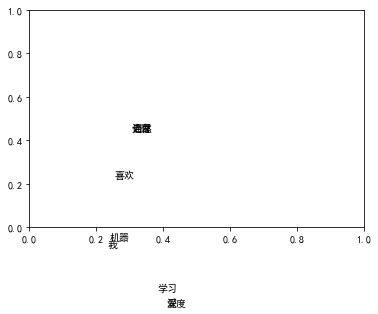

In [16]:
words = ['我', '喜欢', '自然', '语言', '处理', '爱', '深度', '学习', '机器', '。']
for i in range(len(words)):
    plt.text(U[i, 0], U[i, 1], words[i])